# Artemis Experiment Tutorial

The scientific method can generally involves the following loop:

1. Come up with a hypothesis.
2. Create an experiment to test this hypothesis
3. Run experiment, observe, record results.
4. Given results, either celebrate, or return to step 1.

All too often, what we actually do is the following:

1. Come up with hypothesis
2. Create an experiment to test this hypothesis
3. Run, experiment, observe results.
4. Be somehow unsatisfied with results, change some parameter in experiment.
5. Run experiment again with new parameters.
6. Observe results again, remain unsatisfied, revert to step 5 several times.
7. Get tired of waiting for experiments to run just to analyze results.  Start saving results of experiments, so they can be loaded an analyzed at any time.
8. Run several experiments, load and compare results.
9. Realize we've forgotten which parameters correspond to which results.
10. Try to run all experiments again and save their results, this time keeping track of their parameters, but realize we've forgotten the parameters we used in our first experiments.  
11. Eventually get to some result, resolve to be more organized the next time around.
12. Repeat from step 1.

The Artemis Experiment Framework aims to help organize this process.  It does this with the following functionality.

1. **Recording Experimental Results**: The framework captures the console output, plots, and results of an experiment so that we can review them later without having to run the experiment again.  
2. **Creating Variations on Experiments**: The framework allows us to define variants on experiments by changing some parameter.  This allows up to build and maintain a list of variations on our experiment, and the results of running these variations.
3. **Comparing Experiments**: Using the saved results of each experiment, Artemis allows us to easily go back and compare the results of different experiments.

We will demonstrate these in the following tutorial.

## Introduction

Suppose we want to run a simple experiment: We kidnap 5 drunks from the local bar, take them to a point in a secluded field or parking lot, then release them, and record their progress.  While the ethics committee processes our request, we run a simulation to get some preliminary results.  We may code our simulation as follows:

In [ ]:
def demo_drunkards_walk(n_steps=500, n_drunkards=5, homing_instinct = 0, n_dim=2, seed=1234):
    """
    Release several drunkards in a field to randomly stumble around.  Record their progress.
    """
    rng = np.random.RandomState(seed)
    drunkards = np.zeros((n_steps+1, n_drunkards, n_dim))
    for t in xrange(1, n_steps+1):
        drunkards[t] = drunkards[t-1]*(1-homing_instinct) + rng.randn(n_drunkards, n_dim)
        if t%100==0:
            print 'Status at step {}: Mean: {}, STD: {}'.format(t, drunkards[t].mean(), drunkards[t].std())

    plt.plot(drunkards[:, :, 0], drunkards[:, :, 1])
    plt.grid()
    plt.xlabel('$\Delta$ Longitude (arcseconds)')
    plt.ylabel('$\Delta$ Latitude (arcseconds)')
    plt.show()

Status at step 100: Mean: 1.57405821538, STD: 9.7828133144
Status at step 200: Mean: 5.75024469758, STD: 14.1284141764
Status at step 300: Mean: 10.2590679412, STD: 18.3346086878
Status at step 400: Mean: 8.36816763773, STD: 20.314295644
Status at step 500: Mean: 12.1386634509, STD: 21.834830624


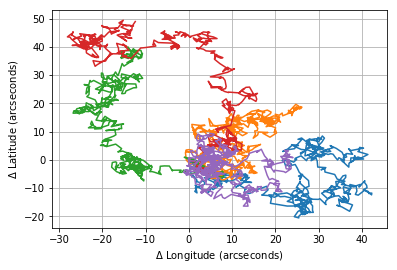

In [7]:
demo_drunkards_walk()

## Running Experiments

Now, suppose our simulation takes a long time to run.  We would like to record our results so that we review them later without having to re-run the experiment.  We can achieve this by decorating our experiment with the "`@experiment_function`" decordator.  The decorator registers the function `demo_drunkards_walk`, as an "experiment", which allows us to capture its output when it is run:   

In [1]:
import numpy as np
from artemis.experiments.experiment_record import experiment_function
from artemis.experiments.ui import browse_experiments
from matplotlib import pyplot as plt


@experiment_function
def demo_drunkards_walk(n_steps=500, n_drunkards=5, homing_instinct = 0, n_dim=2, seed=1234):
    """
    Release several drunkards in a field to randomly stumble around.  Record their progress.
    """
    rng = np.random.RandomState(seed)
    drunkards = np.zeros((n_steps+1, n_drunkards, n_dim))
    for t in xrange(1, n_steps+1):
        drunkards[t] = drunkards[t-1]*(1-homing_instinct) + rng.randn(n_drunkards, n_dim)
        if t%100==0:
            print 'Status at step {}: Mean: {}, STD: {}'.format(t, drunkards[t].mean(), drunkards[t].std())
    
    plt.plot(drunkards[:, :, 0], drunkards[:, :, 1])
    plt.grid()
    plt.xlabel('Step')
    plt.ylabel('Drunkard Position')
    plt.show()

We can now run this experiment by calling `browse_experiments()` to open the experiment user interface, and entering `run 0`, meaning "run experiment 0, record all figures and console output".  (We could also do this programatically with `demo_drunkards_walk.run()`):

==================== Experiments ====================
  E#  R#    Name                 All Runs      Duration    Status    Valid    Result
----  ----  -------------------  ------------  ----------  --------  -------  --------
   0        demo_drunkards_walk  <No Records>  -           -         -        -
-----------------------------------------------------
Enter command or experiment # to run (h for help) >> run 0


INFO:artemis:========== Running Experiment: demo_drunkards_walk ==========
INFO:artemis:Saved Figure: /Users/peter/.artemis/experiments/2017.05.29T18.01.49.144675-demo_drunkards_walk/fig-2017.05.29T18.01.49.268274-.pdf


Status at step 100: Mean: 1.57405821538, STD: 9.7828133144
Status at step 200: Mean: 5.75024469758, STD: 14.1284141764
Status at step 300: Mean: 10.2590679412, STD: 18.3346086878
Status at step 400: Mean: 8.36816763773, STD: 20.314295644
Status at step 500: Mean: 12.1386634509, STD: 21.834830624


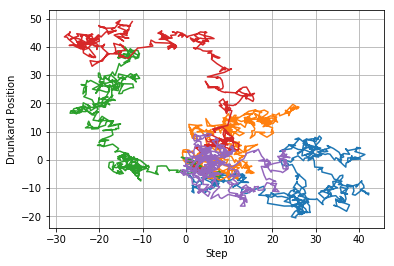

INFO:artemis:========== Done Running Experiment: demo_drunkards_walk ==========


Saving Result for Experiment "2017.05.29T18.01.49.144675-demo_drunkards_walk"
Finished running 1 experiment.


In [2]:
browse_experiments(close_after=True)

## Viewing Results of Experiments

Now if we want to go back later and see these results, we can enter the UI again and enter "`show 0`" meaning "show the results of experiment 0":

In [3]:
browse_experiments(close_after=True)

==================== Experiments ====================
  E#    R#  Name                 All Runs                      Duration  Status           Valid    Result
----  ----  -------------------  --------------------------  ----------  ---------------  -------  -------------------------------
   0     0  demo_drunkards_walk  2017-05-29 18:01:49.144675    0.376496  Ran Succesfully  Yes      <Experiment Returned no result>
-----------------------------------------------------
Enter command or experiment # to run (h for help) >> show 0
    ==================== Showing Experiment ====================
    ExpInfoFields.NAME: demo_drunkards_walk
    ExpInfoFields.ID: 2017.05.29T18.01.49.144675-demo_drunkards_walk
    ExpInfoFields.DIR: /Users/peter/.artemis/experiments/2017.05.29T18.01.49.144675-demo_drunkards_walk
    ExpInfoFields.ARGS: ['n_steps=500', 'n_drunkards=5', 'homing_instinct=0', 'n_dim=2', 'seed=1234']
    ExpInfoFields.FUNCTION: demo_drunkards_walk
    ExpInfoFields.TIMESTAMP: 201

This displays all the output of the experiment, and should pop-up a PDF showing the figure that was created.

# Creating Variants

We now want to try changing parameters to our experiment.  We could of course simply change the default arguments and run again, but then our saved experiment no longer corresponds to the new version of this experiment.  We also want to be able to re-run our original experiment whenever we want (without having to write down the parameters it was run with the first time).  To keep track of our variats without losing the original experiment, we can use the `add_variant` method.

Suppose, in the following example, that we want to give our drunkards a "homing instinct" that makes them tend towards the origin.  We create two variants of our experiment with different degrees of homing instinct:

In [ ]:
import numpy as np
from artemis.experiments.experiment_record import experiment_function
from artemis.experiments.ui import browse_experiments
from matplotlib import pyplot as plt


@experiment_function
def demo_drunkards_walk(n_steps=500, n_drunkards=5, homing_instinct = 0, n_dim=2, seed=1234):
    """
    Release several drunkards in a field to randomly stumble around.  Record their progress.
    """
    rng = np.random.RandomState(seed)
    drunkards = np.zeros((n_steps+1, n_drunkards, n_dim))
    for t in xrange(1, n_steps+1):
        drunkards[t] = drunkards[t-1]*(1-homing_instinct) + rng.randn(n_drunkards, n_dim)
        if t%100==0:
            print 'Status at step {}: Mean: {}, STD: {}'.format(t, drunkards[t].mean(), drunkards[t].std())

    plt.plot(drunkards[:, :, 0], drunkards[:, :, 1])
    plt.grid()
    plt.xlabel('$\Delta$ Longitude (arcseconds)')
    plt.ylabel('$\Delta$ Latitude (arcseconds)')
    plt.show()


demo_drunkards_walk.add_variant(homing_instinct = 0.01)
demo_drunkards_walk.add_variant(homing_instinct = 0.1)

We can now open `browse_experiments()`, and see that our record of experiment 0 is still saved, and we now have two new experiments which have not yet been run.  We can run them by entering `run 1,2`.

==================== Experiments ====================
  E#  R#    Name                                      All Runs                    Duration        Status           Valid    Result
----  ----  ----------------------------------------  --------------------------  --------------  ---------------  -------  -------------------------------
   0  0     demo_drunkards_walk                       2017-05-29 18:01:49.144675  0.376495838165  Ran Succesfully  Yes      <Experiment Returned no result>
   1        demo_drunkards_walk.homing_instinct=0.01  <No Records>                -               -                -        -
   2        demo_drunkards_walk.homing_instinct=0.1   <No Records>                -               -                -        -
-----------------------------------------------------
Enter command or experiment # to run (h for help) >> run 1-2


INFO:artemis:========== Running Experiment: demo_drunkards_walk.homing_instinct=0.01 ==========


Status at step 100: Mean: 0.62840740615, STD: 6.74552910589
Status at step 200: Mean: 3.42914692268, STD: 6.90184403895
Status at step 300: Mean: 4.11921923575, STD: 6.18203918657
Status at step 400: Mean: 0.0495207190658, STD: 7.19851045252
Status at step 500: Mean: 1.92515059329, STD: 6.32224522315


INFO:artemis:Saved Figure: /Users/peter/.artemis/experiments/2017.05.29T18.04.01.513218-demo_drunkards_walk.homing_instinct=0.01/fig-2017.05.29T18.04.01.624975-.pdf


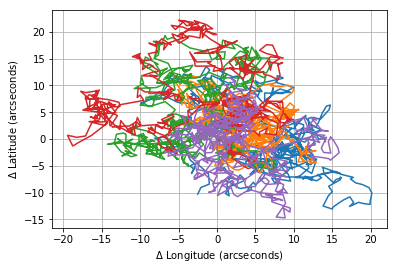

INFO:artemis:========== Done Running Experiment: demo_drunkards_walk.homing_instinct=0.01 ==========
INFO:artemis:========== Running Experiment: demo_drunkards_walk.homing_instinct=0.1 ==========


Saving Result for Experiment "2017.05.29T18.04.01.513218-demo_drunkards_walk.homing_instinct=0.01"
Status at step 100: Mean: -0.0569828113989, STD: 2.00805288062
Status at step 200: Mean: 1.07619503733, STD: 1.94438775805
Status at step 300: Mean: 0.771896073852, STD: 1.99549616655
Status at step 400: Mean: -0.591721081861, STD: 2.575890433
Status at step 500: Mean: -0.0486203389586, STD: 2.67026829592


INFO:artemis:Saved Figure: /Users/peter/.artemis/experiments/2017.05.29T18.04.02.245063-demo_drunkards_walk.homing_instinct=0.1/fig-2017.05.29T18.04.02.314314-.pdf


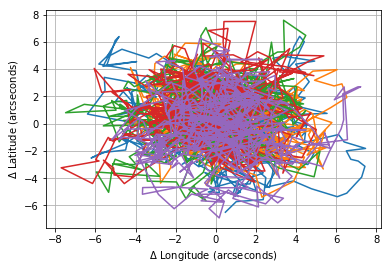

INFO:artemis:========== Done Running Experiment: demo_drunkards_walk.homing_instinct=0.1 ==========


Saving Result for Experiment "2017.05.29T18.04.02.245063-demo_drunkards_walk.homing_instinct=0.1"
Finished running 2 experiments.


In [2]:
browse_experiments(close_after = True)

Note that we can also could also create variants of our variants if we wanted.  For instance, if we wanted to try a drunkard's walk in 3D:  
```
X = demo_drunkards_walk.add_variant(homing_instinct = 0.1)
X.add_variant(n_dim=3)
```

## Separating Display and Computation

The above is ok if our experiments run quickly and we just want to plot what the drunkards are doing.  But we may want to do some other analysis on our results after running the experiment (without having to start again).  Or we may simply want to change the way we plot our results, without having to re-run everythign.  In these cases, it becomes beneficial to separate plotting from computing the results.  We can use the `display_function` argument to do this.  This display_function should accept the return value of your experiment as its first argument.  

In [ ]:
import numpy as np
from artemis.experiments.experiment_record import experiment_function, ExperimentFunction
from artemis.experiments.ui import browse_experiments
from matplotlib import pyplot as plt


def display_drunkards_walk(drunkards):
    plt.plot(drunkards[:, :, 0], drunkards[:, :, 1])
    plt.grid()
    plt.xlabel('$\Delta$ Longitude (arcseconds)')
    plt.ylabel('$\Delta$ Latitude (arcseconds)')
    plt.show()


@ExperimentFunction(display_function=display_drunkards_walk)
def demo_drunkards_walk(n_steps=500, n_drunkards=5, homing_instinct = 0, n_dim=2, seed=1234):
    """
    Release several drunkards in a field to randomly stumble around.  Record their progress.
    """
    rng = np.random.RandomState(seed)
    drunkards = np.zeros((n_steps+1, n_drunkards, n_dim))
    for t in xrange(1, n_steps+1):
        drunkards[t] = drunkards[t-1]*(1-homing_instinct) + rng.randn(n_drunkards, n_dim)
        if t%100==0:
            print 'Status at step {}: Mean: {}, STD: {}'.format(t, drunkards[t].mean(), drunkards[t].std())
    return drunkards


demo_drunkards_walk.add_variant(homing_instinct = 0.01)
demo_drunkards_walk.add_variant(homing_instinct = 0.1)

First, since we've changed the code for our experiment, we delete old experiments and run them all again (output not shown):

In [ ]:
demo_drunkards_walk.clear_records(include_children=True)
demo_drunkards_walk.run_all()

Then browse through our results, and view the results of experiment 1: "`demo_drunkards_walk.homing_instinct=0.01`", by entering "`results 1`".

==================== Experiments ====================
  E#    R#  Name                                      All Runs                      Duration  Status           Valid    Result
----  ----  ----------------------------------------  --------------------------  ----------  ---------------  -------  --------------------------------------
   0     0  demo_drunkards_walk                       2017-05-29 18:07:54.111074   0.0447202  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
   1     0  demo_drunkards_walk.homing_instinct=0.01  2017-05-29 18:07:54.170613   0.0308909  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
   2     0  demo_drunkards_walk.homing_instinct=0.1   2017-05-29 18:07:54.216015   0.0239739  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
-----------------------------------------------------
Enter command or experiment # to run (h for help) >> results 1
    Results:
    |   2017.05.29T18.07.54.170613-demo_drunkards_wal

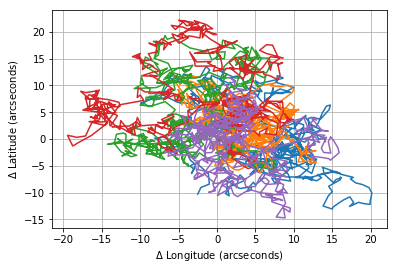

    |   ```
    ```


In [7]:
browse_experiments(close_after=True)

## Comparing Results across experiments

Eventually we want to compare the results of different experiments.  For this, we can define the `comparison_function` argument.  This accepts a dictionary, indexed by the experiment name, with values being the return values from saved experiments.  

In [ ]:
import numpy as np
from artemis.experiments.experiment_record import ExperimentFunction
from artemis.experiments.ui import browse_experiments
from matplotlib import pyplot as plt


def compare_drunkards_walk(dict_of_drunkards):
    plot_handles = []
    for i, (exp_name, drunkards) in enumerate(dict_of_drunkards.iteritems()):
        plot_handles.append(plt.plot(drunkards[:, :, 0], drunkards[:, :, 1], color='C{}'.format(i)))
    plt.grid()
    plt.xlabel('$\Delta$ Longitude (arcseconds)')
    plt.ylabel('$\Delta$ Latitude (arcseconds)')
    plt.legend([p[0] for p in plot_handles], dict_of_drunkards.keys())
    plt.show()
    

@ExperimentFunction(comparison_function=compare_drunkards_walk)
def demo_drunkards_walk(n_steps=500, n_drunkards=5, homing_instinct = 0, n_dim=2, seed=1234):
    """
    Release several drunkards in a field to randomly stumble around.  Record their progress.
    """
    rng = np.random.RandomState(seed)
    drunkards = np.zeros((n_steps+1, n_drunkards, n_dim))
    for t in xrange(1, n_steps+1):
        drunkards[t] = drunkards[t-1]*(1-homing_instinct) + rng.randn(n_drunkards, n_dim)
        if t%100==0:
            print 'Status at step {}: Mean: {}, STD: {}'.format(t, drunkards[t].mean(), drunkards[t].std())
    return drunkards


demo_drunkards_walk.add_variant(homing_instinct = 0.01)
demo_drunkards_walk.add_variant(homing_instinct = 0.1)

==================== Experiments ====================
  E#    R#  Name                                      All Runs                      Duration  Status           Valid    Result
----  ----  ----------------------------------------  --------------------------  ----------  ---------------  -------  --------------------------------------
   0     0  demo_drunkards_walk                       2017-05-29 18:07:54.111074   0.0447202  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
   1     0  demo_drunkards_walk.homing_instinct=0.01  2017-05-29 18:07:54.170613   0.0308909  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
   2     0  demo_drunkards_walk.homing_instinct=0.1   2017-05-29 18:07:54.216015   0.0239739  Ran Succesfully  Yes      ndarray<shape=(501,5,2),dtype=float64>
-----------------------------------------------------
Enter command or experiment # to run (h for help) >> compare_results 0-2


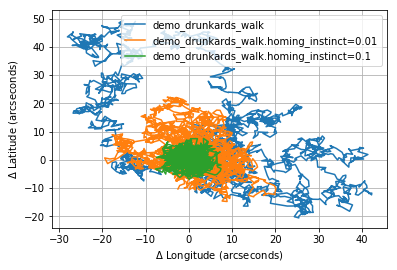

In [12]:
browse_experiments(close_after=True)

# Conclusion

The value of the experiment framework is that it lets you keep track of the things you've tried and the outcomes.  This is intended to replace the mish-mash of solutions that people usually use when doing this kind of thing (e.g. saving old commands in terminal, writing results to file and manually loading them later, etc).  